In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [7]:
df = pd.read_csv('Python算法\机器学习实践项目(自做)\实践项目数据\seattle-weather.csv')
df

,日期,降水量,最高气温,最低气温,风力,天气
0,2012/1/1,0.0,12.8,5.0,4.7,drizzle
1,2012/1/2,10.9,10.6,2.8,4.5,rain
2,2012/1/3,0.8,11.7,7.2,2.3,rain
3,2012/1/4,20.3,12.2,5.6,4.7,rain
4,2012/1/5,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015/12/27,8.6,4.4,1.7,2.9,rain
1457,2015/12/28,1.5,5.0,1.7,1.3,rain
1458,2015/12/29,0.0,7.2,0.6,2.6,fog
1459,2015/12/30,0.0,5.6,-1.0,3.4,sun


In [8]:
#拆分日期
data = pd.to_datetime(df['日期'])
df['年'] = data.dt.year
df['月'] = data.dt.month
df['日'] = data.dt.day
df = df.drop(columns=['日期'])
df

,降水量,最高气温,最低气温,风力,天气,年,月,日
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [9]:
#特征
X=df.drop(columns=['天气'])

In [10]:
#编码 将字符串类型 编码为数值
label_encoder = LabelEncoder()
df['天气']=label_encoder.fit_transform(df['天气'])
df['天气']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: 天气, Length: 1461, dtype: int32

In [11]:
#标签
y=df['天气']

In [12]:
#划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
#构建随机森林模型 传一个参数 数的数量
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
#模型预测
y_pred = model.predict(X_test)
accuracy_scores=accuracy_score(y_pred,y_test)
accuracy_scores

0.8600682593856656

[Text(0.4550443672839506, 0.96875, 'x[5] <= 3.5\ngini = 0.625\nsamples = 747\nvalue = [47, 100, 489, 22, 510]'),
 Text(0.17006172839506173, 0.90625, 'x[3] <= 2.95\ngini = 0.59\nsamples = 179\nvalue = [11, 22, 161, 16, 65]'),
 Text(0.31255304783950616, 0.9375, 'True  '),
 Text(0.09444444444444444, 0.84375, 'x[2] <= 3.6\ngini = 0.679\nsamples = 85\nvalue = [9, 17, 55, 4, 42]'),
 Text(0.05864197530864197, 0.78125, 'x[0] <= 0.15\ngini = 0.682\nsamples = 46\nvalue = [9, 5, 18, 4, 32]'),
 Text(0.028395061728395062, 0.71875, 'x[2] <= -0.55\ngini = 0.488\nsamples = 33\nvalue = [9, 5, 1, 0, 32]'),
 Text(0.014814814814814815, 0.65625, 'x[6] <= 16.5\ngini = 0.486\nsamples = 8\nvalue = [7, 0, 0, 0, 5]'),
 Text(0.009876543209876543, 0.59375, 'x[1] <= 3.9\ngini = 0.278\nsamples = 4\nvalue = [1, 0, 0, 0, 5]'),
 Text(0.0049382716049382715, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.014814814814814815, 0.53125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 5]'),
 Text(0.0197

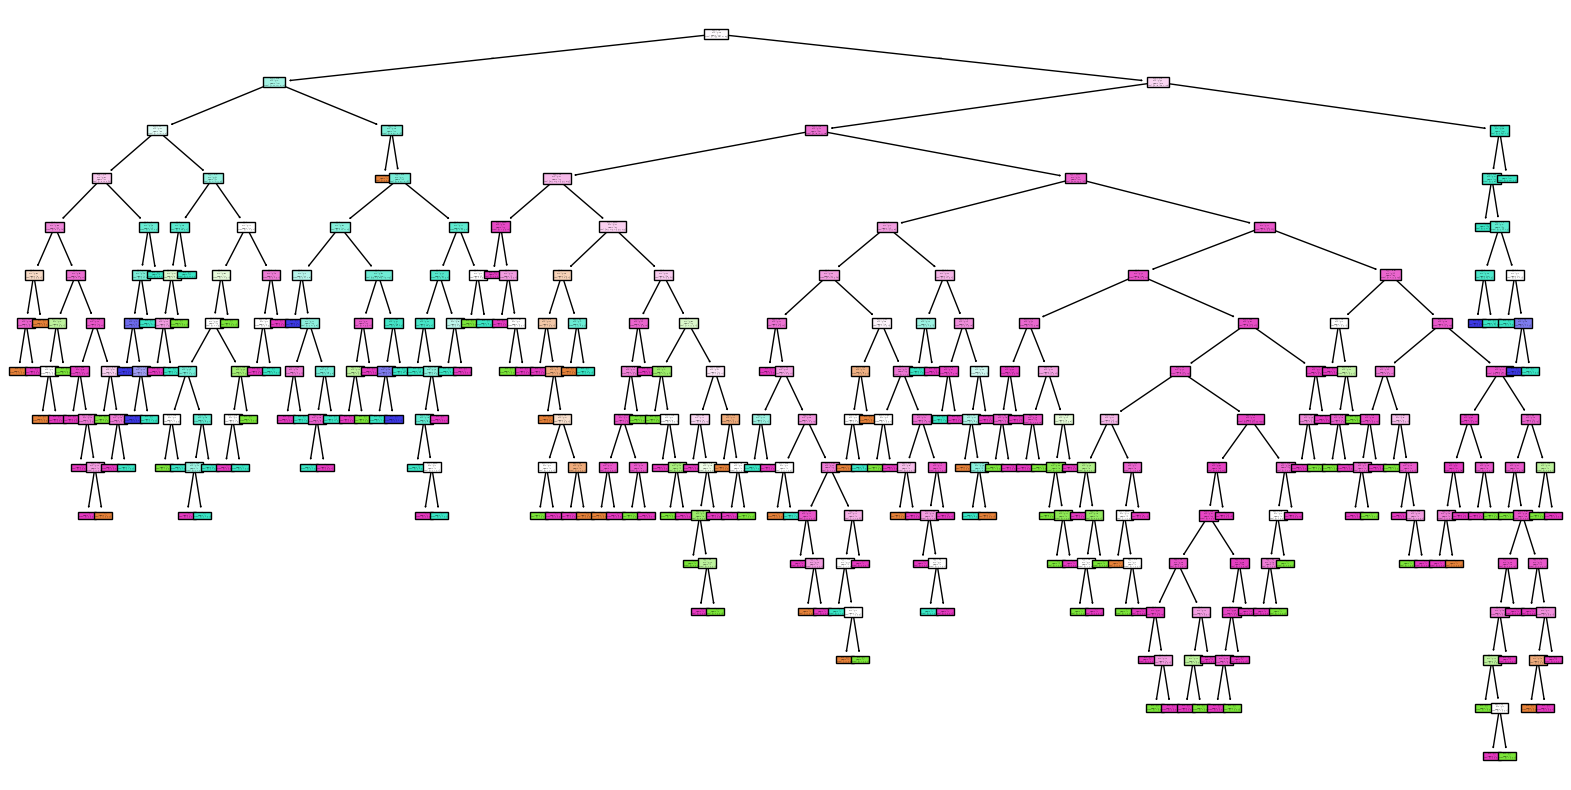

In [15]:
#随机绘画一个决策树
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号"

plt.figure(figsize=(20,10))
plot_tree(
model.estimators_[0],
filled=True
)


In [18]:
import numpy as np
def weather_predict(降水量,最高气温,最低气温,风力,年,月,日):
    input_features=np.array([[降水量,最高气温,最低气温,风力,年,月,日]])
    predicted_code=model.predict(input_features)
    weather=label_encoder.inverse_transform(predicted_code)
    return f"预测的结果为:{weather[0]}"

In [19]:
result=weather_predict(0.0,12.8,5.0,4.7,2012,1,1)
result

D:\编程教程\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'预测的结果为:drizzle'